## HW1
Tianyu (Tina) Zhang ｜ tz2563@columbia.edu
<br>
Github link: https://github.com/TinaZ0407/QMSSGR5074-HW1


# Part 1.
Explore bivariate results (Use visualizations!) Describe any relationships you see between particular features and the target variable

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.0/967.0 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 KB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 KB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.3/442.3 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.

In [2]:
#library
from zipfile import ZipFile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [4]:
# Load data
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [6]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [7]:
# check shape of X dataa after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [8]:
#one-hot-encode
new_data = X_train.drop(['Country or region', 'name'], axis=1)
one_hot_encoded_data = pd.get_dummies(new_data, columns = ['region', 'sub-region'])
one_hot_encoded_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
0,0.960,1.274,0.854,0.455,0.083,0.027,18.000000,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0.694,1.325,0.835,0.435,0.200,0.127,125.611111,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1.181,1.156,0.999,0.067,0.000,0.034,112.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.684,1.313,0.871,0.555,0.220,0.167,57.333333,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.745,1.529,0.756,0.631,0.322,0.240,125.611111,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
type(y_train_labels)

pandas.core.series.Series

In [10]:
column_names = ['world_happiness']
new_y = y_train_labels.copy()
new_y = new_y.to_frame()
new_y.columns = column_names
df = pd.concat([one_hot_encoded_data, new_y], axis = 1)
df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe,world_happiness
0,0.960,1.274,0.854,0.455,0.083,0.027,18.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,Average
1,0.694,1.325,0.835,0.435,0.200,0.127,125.611111,0,1,0,...,0,0,0,0,0,0,0,0,0,High
2,1.181,1.156,0.999,0.067,0.000,0.034,112.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,Average
3,1.684,1.313,0.871,0.555,0.220,0.167,57.333333,0,0,1,...,0,0,0,0,0,0,0,1,0,Very High
4,0.745,1.529,0.756,0.631,0.322,0.240,125.611111,0,0,1,...,0,0,0,0,0,0,0,0,0,High


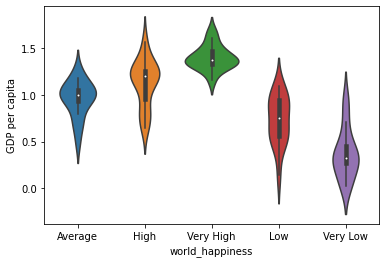

In [11]:
#GDP per capita
sns.violinplot(x = "world_happiness", y = "GDP per capita", data = df)

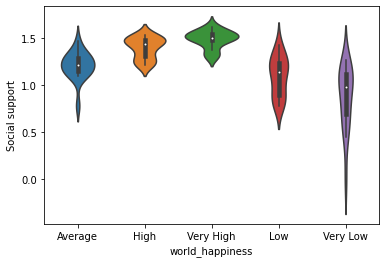

In [12]:
#Social support
sns.violinplot(x = "world_happiness", y = "Social support", data = df)

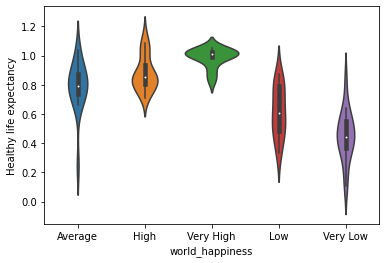

In [13]:
#Healthy life expectancy
sns.violinplot(x = "world_happiness", y = "Healthy life expectancy", data = df)

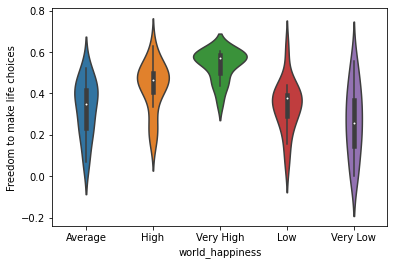

In [14]:
#Freedom to make life choices
sns.violinplot(x = "world_happiness", y = "Freedom to make life choices", data = df)

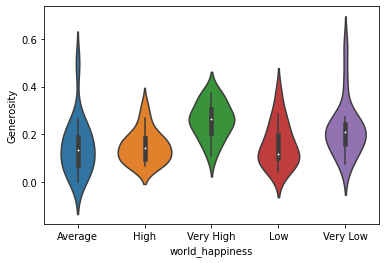

In [15]:
#Generosity	
sns.violinplot(x = "world_happiness", y = "Generosity", data = df)

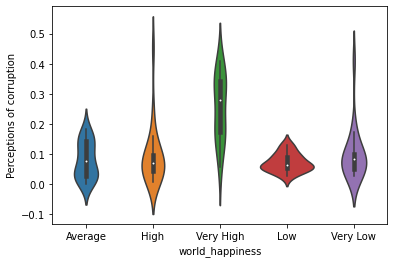

In [16]:
#Perceptions of corruption	
sns.violinplot(x = "world_happiness", y = "Perceptions of corruption", data = df)

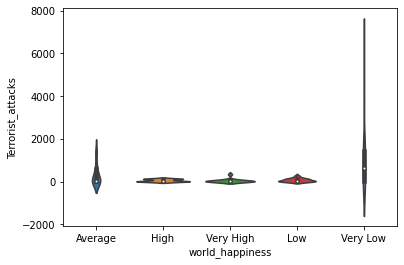

In [17]:
#Terrorist_attacks
sns.violinplot(x = "world_happiness", y = "Terrorist_attacks", data = df)

In [18]:
df.corr(method='pearson', min_periods=1)


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks,region_Africa,region_Americas,region_Asia,...,sub-region_Latin America and the Caribbean,sub-region_Northern Africa,sub-region_Northern America,sub-region_Northern Europe,sub-region_South-eastern Asia,sub-region_Southern Asia,sub-region_Southern Europe,sub-region_Sub-Saharan Africa,sub-region_Western Asia,sub-region_Western Europe
GDP per capita,1.000000,0.753791,0.840467,0.458313,-0.069164,0.349372,-0.352544,-0.608846,-0.001515,0.097977,...,-0.039079,0.012154,0.117027,0.304511,0.015744,-0.109510,0.169986,-0.650110,0.149714,0.275561
Social support,0.753791,1.000000,0.709605,0.502305,-0.015965,0.279549,-0.339582,-0.572955,0.135592,-0.014005,...,0.106452,-0.106666,0.106858,0.330665,0.021245,-0.187707,0.095471,-0.554072,0.014208,0.210216
Healthy life expectancy,0.840467,0.709605,1.000000,0.419038,-0.024471,0.371450,-0.410411,-0.736610,0.113455,0.117944,...,0.075081,-0.022802,0.133066,0.270324,0.002361,-0.075898,0.257211,-0.768204,0.100768,0.256761
Freedom to make life choices,0.458313,0.502305,0.419038,1.000000,0.327923,0.496876,-0.362758,-0.292489,0.078398,0.114921,...,0.036182,-0.124735,0.140933,0.246487,0.232560,-0.106169,-0.133514,-0.248504,0.014087,0.171610
Generosity,-0.069164,-0.015965,-0.024471,0.327923,1.000000,0.327683,0.032479,-0.111392,-0.025486,0.136947,...,-0.060255,-0.225223,0.105490,0.155352,0.443246,0.116772,-0.036182,-0.007793,-0.137363,-0.005790
Perceptions of corruption,0.349372,0.279549,0.371450,0.496876,0.327683,1.000000,-0.160908,-0.146931,-0.103772,0.045005,...,-0.172186,-0.027424,0.201272,0.383853,0.135092,-0.092749,-0.217390,-0.142054,0.005720,0.314071
Terrorist_attacks,-0.352544,-0.339582,-0.410411,-0.362758,0.032479,-0.160908,1.000000,0.161613,-0.072009,0.079290,...,-0.061668,0.109836,-0.040729,-0.088105,-0.061609,0.365525,-0.059561,0.117315,-0.012929,-0.073545
region_Africa,-0.608846,-0.572955,-0.736610,-0.292489,-0.111392,-0.146931,0.161613,1.000000,-0.250313,-0.385758,...,-0.238095,0.346410,-0.067537,-0.185185,-0.137464,-0.137464,-0.212622,0.888735,-0.225555,-0.137464
region_Americas,-0.001515,0.135592,0.113455,0.078398,-0.025486,-0.103772,-0.072009,-0.250313,1.000000,-0.243332,...,0.951190,-0.086711,0.269809,-0.116813,-0.086711,-0.086711,-0.134119,-0.222462,-0.142278,-0.086711
region_Asia,0.097977,-0.014005,0.117944,0.114921,0.136947,0.045005,0.079290,-0.385758,-0.243332,1.000000,...,-0.231455,-0.133631,-0.065653,-0.180021,0.356348,0.356348,-0.206692,-0.342837,0.584705,-0.133631


### Findings
Firstly, even though the problem is not discussing about the relationship between independent variables, we still need to check the correlation before starting the prediction. The absolute correlation between "GDP per capita" and "Social support", "GDP per capita" and "Healthy life expectancy", "Healthy life expectancy" and "region_Africa" are all above 0.5. This will impact the ability to identify strong predictors. 

And there are positive relationship between Happiness and GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices. The higher those features are, the higher happniess level will be, which is aligned with the correlation between variables.

The relationships between Generosity and happiness as well as Perceptions of corruption and happiness are interesting. The average Corruption perception only appears higher in the group of Very High happiness level group, and remains almost the same in other four groups. And except for the Very High happiness level group, the generosity in the very low happiness level group is also higher than other three groups.

As for Terrorist_attacks, it appears a little higher only in Very Low happiness category, largely because the overall number of Terrorist_attacks is relatively low at all regions.

# Part 2.
Examine features that predict happiness categories using one or more models that allow for automatic feature selection.
Explain any meaningful findings

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(preprocessor(X_train), y_train_labels)
rf.score(preprocessor(X_train), y_train_labels)

0.9659090909090909

In [20]:
New_X = preprocessor(X_train)
New_1 = np.delete(New_X, np.s_[23:24],axis=1)
New_2 = np.delete(New_1, np.s_[7:8],axis=1)
New_3 = np.delete(New_2, np.s_[1:3],axis=1)
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(New_3, y_train_labels)
rf.score(New_3, y_train_labels)

0.9431818181818182

In [21]:
dropped_one_hot_encoded_data = one_hot_encoded_data.drop(['Social support','Healthy life expectancy', 'region_Africa','sub-region_Northern Africa'], axis=1)

In [22]:
rf.feature_importances_

array([0.25291468, 0.16200783, 0.10009515, 0.15175429, 0.12591355,
       0.02173594, 0.016108  , 0.04491852, 0.00051666, 0.00236044,
       0.00626446, 0.00592711, 0.00792311, 0.01803143, 0.01293678,
       0.00286587, 0.01529707, 0.01312036, 0.00982654, 0.01418676,
       0.00317944, 0.01211601])

<BarContainer object of 22 artists>

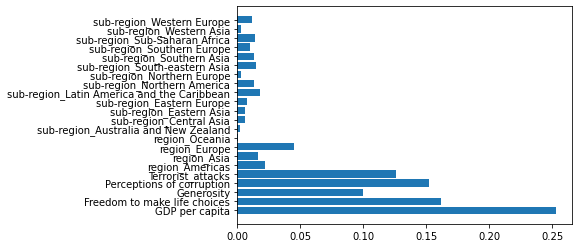

In [23]:
#Because the order of variables by changing into array will not change, I mapped the original encoded data's columns to the feature importances.
plt.barh(dropped_one_hot_encoded_data.columns, rf.feature_importances_)

## Findings
By seeing the feature importance using Random Forest Classification, I found that the "GDP per capita" is the most important predictor for the happiness value. Followed by Perceptions of corruption, Freedom to make life choices, Terrorist attacks, and Generosity. This indicates that the happiness is highly related with the level of development of a country.

And after delete the regions of Africa because of the correlation, I noticed that among all encoded regions and sub-regions left, Europe has the highest significance. 



# Part 3.
Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)

#### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(preprocessor(X_train), y_train_labels)
rf.score(preprocessor(X_train), y_train_labels)

0.9545454545454546

In [25]:
#Save preprocessor function to local "preprocessor.zip" file
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [26]:
#Generate predictions from X_test data and submit model to competition
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [27]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model rf: 

#-- Generate predicted values (Model rf)
prediction_labels = rf.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): Random Forest
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 634

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'n_estimators': np.arange(100, 300, 500),'max_depth':[1, 3, 5,7]} #np.arange creates sequence of numbers for each k value

gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=9)

#use meta model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.648
best parameters: {'max_depth': 7, 'n_estimators': 100}


In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(gridmodel, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("gridmodel.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model gridmodel: 

#-- Generate predicted values
prediction_labels = gridmodel.predict(preprocessor(X_test))

# Submit to Competition Leaderboard
mycompetition.submit_model(model_filepath = "gridmodel.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): gridmodel
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 638

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from onnxmltools.convert.sparkml.utils import FloatTensorType

#Fit model:
GBC = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
GBC.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(GBC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = GBC.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})


Insert search tags to help users find your model (optional): GBC
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 651

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300
4/4 [==============================] - 1s 107ms/step - loss: 1.6207 - accuracy: 0.1970 - val_loss: 1.6561 - val_accuracy: 0.1818
Epoch 2/300
4/4 [==============================] - 0s 16ms/step - loss: 1.6060 - accuracy: 0.1970 - val_loss: 1.6490 - val_accuracy: 0.1818
Epoch 3/300
4/4 [==============================] - 0s 24ms/step - loss: 1.5952 - accuracy: 0.1970 - val_loss: 1.6431 - val_accuracy: 0.1818
Epoch 4/300
4/4 [==============================] - 0s 25ms/step - loss: 1.5853 - accuracy: 0.1970 - val_loss: 1.6367 - val_accuracy: 0.1818
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 1.5730 - accuracy: 0.1970 - val_loss: 1.6305 - val_accuracy: 0.1818
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 1.5636 - accuracy: 0.1970 - val_loss: 1.6256 - val_accuracy: 0.1818
Epoch 7/300
4/4 [==============================] - 0s 22ms/step - loss: 1.5550 - accuracy: 0.1970 - val_loss: 1.6207 - val_accuracy: 0.1364
Epoch 8/300
4/4 [==

In [ ]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

3/3 [==============================] - 0s 5ms/step
Insert search tags to help users find your model (optional): deep learning
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 649

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Check leaderboard 

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

Among all the models I tried, GradientBoostingClassification performs the best. And because we choose the same models, our group members discussed about the parameters we chose.

### random forest

In [41]:
rf_adjust = RandomForestClassifier(n_estimators=200, max_depth=5)
rf_adjust.fit(preprocessor(X_train), y_train_labels)
rf_adjust.score(preprocessor(X_train), y_train_labels)

0.9318181818181818

In [42]:

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(rf, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
#Submit Model rf: 

#-- Generate predicted values (Model rf)
prediction_labels = rf_adjust.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): rf_adj
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 834

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### GBC

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from onnxmltools.convert.sparkml.utils import FloatTensorType
#Fit model:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
GBC.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(GBC, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = GBC.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Insert search tags to help users find your model (optional): GBC_adj
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 831

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### Deep Learning

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))


keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata={"team":"1"})

Epoch 1/300
4/4 [==============================] - 1s 89ms/step - loss: 1.6145 - accuracy: 0.2121 - val_loss: 1.6218 - val_accuracy: 0.1818
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 1.6066 - accuracy: 0.2727 - val_loss: 1.6185 - val_accuracy: 0.2273
Epoch 3/300
4/4 [==============================] - 0s 11ms/step - loss: 1.5993 - accuracy: 0.2879 - val_loss: 1.6145 - val_accuracy: 0.1818
Epoch 4/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5925 - accuracy: 0.3030 - val_loss: 1.6107 - val_accuracy: 0.1818
Epoch 5/300
4/4 [==============================] - 0s 17ms/step - loss: 1.5853 - accuracy: 0.3485 - val_loss: 1.6075 - val_accuracy: 0.1818
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.5794 - accuracy: 0.3636 - val_loss: 1.6039 - val_accuracy: 0.1818
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 1.5718 - accuracy: 0.3636 - val_loss: 1.6005 - val_accuracy: 0.1818
Epoch 8/300
4/4 [===